In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data_for_model = data.copy()
data_for_model['Sex'] = data_for_model['Sex'].map({'male': 0, 'female': 1})

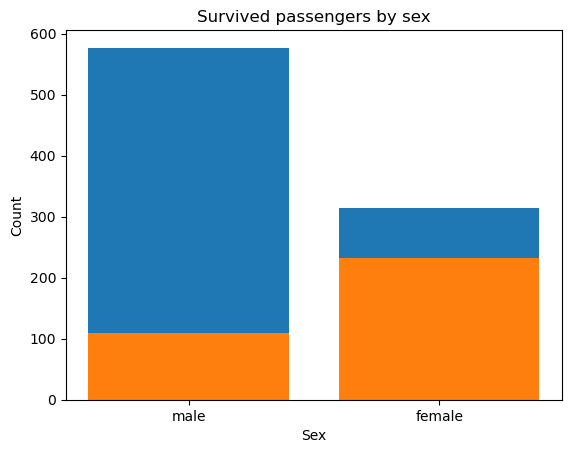

In [6]:
sex_count = data['Sex'].value_counts()
survived_by_sex = data.groupby('Sex')['Survived'].sum()
fig, ax = plt.subplots()
bar1 = ax.bar(sex_count.index, sex_count.values)
bar2 = ax.bar(survived_by_sex.index, survived_by_sex.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survived passengers by sex')
plt.show()

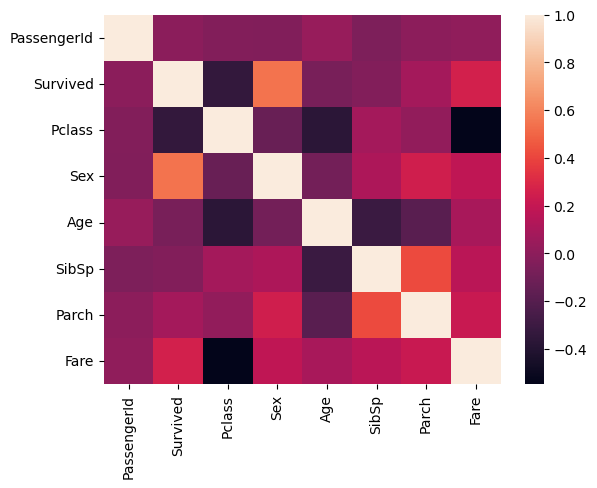

In [7]:
sns.heatmap(data_for_model.corr(numeric_only=True))
plt.show()

In [10]:
X = data_for_model.select_dtypes(include='number').drop('Survived', axis=1).dropna()
y = data_for_model.select_dtypes(include='number').dropna()['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model predicted with accuracy: {accuracy}')

Model predicted with accuracy: 0.8041958041958042
